**MAJOR PROJECT JUNE 2022**<BR>
**DONY BY: SHEEMA ANUSH **

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

In [ ]:
df=pd.read_csv("/content/amazon_alexa_data.csv",encoding="latin_1")

In [ ]:
df.head(15)

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,9,5,30-Jul-18,Heather Gray Fabric,Love it! Iâve listened to songs I havenât ...,1


In [ ]:
df.shape

(3150, 6)

In [ ]:
df.isnull().sum()

Unnamed: 0          0
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.isnull().mean()*100

Unnamed: 0          0.0
rating              0.0
date                0.0
variation           0.0
verified_reviews    0.0
feedback            0.0
dtype: float64

**Dropping columns not needed in Sentiment analysis**





In [ ]:
df.head(2)

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1


In [ ]:
df=df[df.feedback !='Neutral']

In [ ]:
# Dropping Username, ScreenName,Location,TweetAt
df.drop(['Unnamed: 0','rating','date','variation'],axis=1,inplace=True)

In [ ]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [ ]:
df.isnull().sum()

verified_reviews    0
feedback            0
dtype: int64

In [ ]:
type(df)

pandas.core.frame.DataFrame

**Text preprocessing**

In [ ]:
df['verified_reviews'].isnull().sum()

0

In [ ]:
df['verified_reviews'].str.lower()

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import neattext.functions as nfx
import re

In [ ]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [ ]:
df['clean_tweet']=df['verified_reviews'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
df.head()

,verified_reviews,feedback,clean_tweet
0,Love my Echo!,1,Love my Echo!
1,Loved it!,1,Loved it!
2,"Sometimes while playing a game, you can answer...",1,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing. My 4 ...
4,Music,1,Music


In [ ]:
df[['verified_reviews','clean_tweet']].iloc[4]

verified_reviews    Music
clean_tweet         Music
Name: 4, dtype: object

In [ ]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_hashtags(x))

In [ ]:
df.head()

,verified_reviews,feedback,clean_tweet
0,Love my Echo!,1,Love my Echo!
1,Loved it!,1,Loved it!
2,"Sometimes while playing a game, you can answer...",1,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing. My 4 ...
4,Music,1,Music


In [ ]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_urls(x))

In [ ]:
df.head()

,verified_reviews,feedback,clean_tweet
0,Love my Echo!,1,Love my Echo!
1,Loved it!,1,Loved it!
2,"Sometimes while playing a game, you can answer...",1,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing. My 4 ...
4,Music,1,Music


In [ ]:
df[['verified_reviews','clean_tweet']].iloc[0]

verified_reviews    Love my Echo!
clean_tweet         Love my Echo!
Name: 0, dtype: object

In [ ]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_punctuations(x))

In [ ]:
df.head()

,verified_reviews,feedback,clean_tweet
0,Love my Echo!,1,Love my Echo
1,Loved it!,1,Loved it
2,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...
4,Music,1,Music


In [ ]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_stopwords(x))

In [ ]:
df.head()

,verified_reviews,feedback,clean_tweet
0,Love my Echo!,1,Love Echo
1,Loved it!,1,Loved
2,"Sometimes while playing a game, you can answer...",1,playing game answer question correctly Alexa s...
3,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...
4,Music,1,Music


In [ ]:
df['clean_tweet'].isnull().sum()

0

In [ ]:
#Stopwords, Mentions, Urls, Hashtags and Punctuations removed

In [ ]:
df['clean_tweet']=df['clean_tweet'] #.str.lower()

In [ ]:
df.verified_reviews.dtype

dtype('O')

In [ ]:
df.head()

,verified_reviews,feedback,clean_tweet
0,Love my Echo!,1,Love Echo
1,Loved it!,1,Loved
2,"Sometimes while playing a game, you can answer...",1,playing game answer question correctly Alexa s...
3,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...
4,Music,1,Music


**Tokenization**

In [ ]:
def tokenize(txt):
    tokens=re.split('\W+',txt)
    return tokens
df['c_t_tokenized']=df['clean_tweet'].apply(lambda x: tokenize(x.lower()))

In [ ]:
df.head(5)

,verified_reviews,feedback,clean_tweet,c_t_tokenized
0,Love my Echo!,1,Love Echo,"[love, echo]"
1,Loved it!,1,Loved,[loved]
2,"Sometimes while playing a game, you can answer...",1,playing game answer question correctly Alexa s...,"[playing, game, answer, question, correctly, a..."
3,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,Music,1,Music,[music]


In [ ]:
df[['verified_reviews','clean_tweet','c_t_tokenized']].iloc[2]

verified_reviews    Sometimes while playing a game, you can answer...
clean_tweet         playing game answer question correctly Alexa s...
c_t_tokenized       [playing, game, answer, question, correctly, a...
Name: 2, dtype: object

**STEMMING**

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps=PorterStemmer()

In [ ]:
def stemming(token_txt):
    text=[ps.stem(w) for w in token_txt]
    return text

In [ ]:
df['clean_stemmed']=df['c_t_tokenized'].apply(lambda x: stemming(x))

In [ ]:
df.head()

,verified_reviews,feedback,clean_tweet,c_t_tokenized,clean_stemmed
0,Love my Echo!,1,Love Echo,"[love, echo]","[love, echo]"
1,Loved it!,1,Loved,[loved],[love]
2,"Sometimes while playing a game, you can answer...",1,playing game answer question correctly Alexa s...,"[playing, game, answer, question, correctly, a...","[play, game, answer, question, correctli, alex..."
3,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...","[lot, fun, thing, 4, yr, old, learn, dinosaur,..."
4,Music,1,Music,[music],[music]


**Stemming is prone to errors and words processed don't give much of meaning. Therefore we go for lemmatization**

**LEMMATIZATION**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def lemma(token_txt):
    text=[wn.lemmatize(w) for w in token_txt]
    return text


In [ ]:
df['clean_lemmatized']=df['c_t_tokenized'].apply(lambda x: lemma(x))

In [ ]:
df.head()

,verified_reviews,feedback,clean_tweet,c_t_tokenized,clean_stemmed,clean_lemmatized
0,Love my Echo!,1,Love Echo,"[love, echo]","[love, echo]","[love, echo]"
1,Loved it!,1,Loved,[loved],[love],[loved]
2,"Sometimes while playing a game, you can answer...",1,playing game answer question correctly Alexa s...,"[playing, game, answer, question, correctly, a...","[play, game, answer, question, correctli, alex...","[playing, game, answer, question, correctly, a..."
3,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...","[lot, fun, thing, 4, yr, old, learn, dinosaur,...","[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,Music,1,Music,[music],[music],[music]


**Replacing "Extremely" from the target variables**

In [ ]:
df['feedback']

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [ ]:
df['feedback'].replace(['Extremely Positive','Extremely Negative'],['Positive','Negative'], inplace=True)

In [ ]:
df['feedback']

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [ ]:
df.head()

,verified_reviews,feedback,clean_tweet,c_t_tokenized,clean_stemmed,clean_lemmatized
0,Love my Echo!,1,Love Echo,"[love, echo]","[love, echo]","[love, echo]"
1,Loved it!,1,Loved,[loved],[love],[loved]
2,"Sometimes while playing a game, you can answer...",1,playing game answer question correctly Alexa s...,"[playing, game, answer, question, correctly, a...","[play, game, answer, question, correctli, alex...","[playing, game, answer, question, correctly, a..."
3,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...","[lot, fun, thing, 4, yr, old, learn, dinosaur,...","[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,Music,1,Music,[music],[music],[music]


In [ ]:
df["clean_lemmatized"].str.len() != 0 #Therefore no string is empty

0       True
1       True
2       True
3       True
4       True
        ... 
3145    True
3146    True
3147    True
3148    True
3149    True
Name: clean_lemmatized, Length: 3150, dtype: bool

**CLEANING FUNCTION**

In [ ]:
def clean(txt):
    txt="".join([c for c in txt if c not in string.punctuation])
    tokens= re.split('\W+',txt)
    txt= [ps.stem(word) for word in tokens if word not in stopwords]
#     df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_urls(x))
    return txt


**TF-IDF Vectorization**

In [ ]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf= TfidfVectorizer(analyzer=clean)

In [ ]:
x = tfidf.fit_transform(df['clean_tweet'])
print(x.shape)

(3150, 3199)


In [ ]:
df1= pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df1

,,072318,1,10,100,1000,100x,1010,1030pm,11,...,zzzz,zzzzzzz,³,¼ï,¾,â,ã,ãºtil,ï,ð
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y=pd.get_dummies(df['feedback'])

In [ ]:
y

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
3145,0,1
3146,0,1
3147,0,1
3148,0,1


In [ ]:
y=y.iloc[:,0].values

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0) 

**Naive Bayes Classification with Confusion Matrix**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
sentiment_analysis_model = MNB.fit(X_train,y_train)

In [ ]:
y_pred = sentiment_analysis_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
NBC_CM=confusion_matrix(y_test,y_pred)
NBC_CM

array([[576,   0],
       [ 54,   0]])

In [ ]:
from sklearn.metrics import accuracy_score
NBC_acc=accuracy_score(y_test,y_pred)
NBC_acc

0.9142857142857143

**SVM Classification with Confusion Matrix**

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
SVM_CM=confusion_matrix(y_test,svm_pred)
SVM_CM

array([[576,   0],
       [ 46,   8]])

In [ ]:
SVM_acc=accuracy_score(y_test,svm_pred)
SVM_acc

0.926984126984127

**KNN Classificationn with Confusion matrix**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn_pred=knn.predict(X_test)
knn_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
KNN_CM=confusion_matrix(y_test,knn_pred)
KNN_CM

array([[555,  21],
       [ 49,   5]])

In [ ]:
KNN_acc=accuracy_score(y_test,knn_pred)
KNN_acc

0.8888888888888888

<BarContainer object of 3 artists>

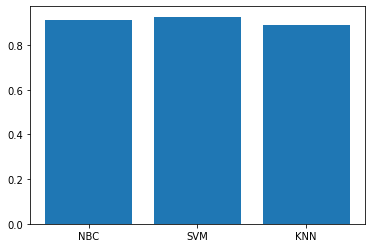

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x=['NBC','SVM','KNN'],height=[NBC_acc,SVM_acc,KNN_acc])

**Therefore SVM model has the highest accuracy score for this dataset.**